In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving testset.csv to testset.csv
Saving trainset.csv to trainset.csv


In [ ]:
#*************Data Cleaning*****************

#Copied these read CSV statements - We will have to remove them from the following cells or decide on another way to arrange them
testSet = pd.read_csv('testset.csv')
trainSet = pd.read_csv('trainset.csv')

#Checking for Null Values - None detected
testSet.isnull().sum()
trainSet.isnull().sum()

#clean testing set
testSet.drop(testSet.index[testSet['job'] =='unknown' ], inplace = True)
testSet.drop(testSet.index[testSet['marital'] =='unknown' ], inplace = True)
testSet.drop(testSet.index[testSet['education'] =='unknown' ], inplace = True)
testSet.drop(testSet.index[testSet['housing'] =='unknown' ], inplace = True)
testSet.drop(testSet.index[testSet['loan'] =='unknown' ], inplace = True)

#clean training set
trainSet.drop(trainSet.index[trainSet['job'] =='unknown' ], inplace = True)
trainSet.drop(trainSet.index[trainSet['marital'] =='unknown' ], inplace = True)
trainSet.drop(trainSet.index[trainSet['education'] =='unknown' ], inplace = True)
trainSet.drop(trainSet.index[trainSet['housing'] =='unknown' ], inplace = True)
trainSet.drop(trainSet.index[trainSet['loan'] =='unknown' ], inplace = True)


In [ ]:
testSet = pd.read_csv('testset.csv')

testSet['Subscribed_val'] = testSet['Subscribed'].map({'yes': 1, 'no': 0})

testSet = pd.get_dummies(testSet, columns=['age'])
testSet = pd.get_dummies(testSet, columns=['job'])
testSet = pd.get_dummies(testSet, columns=['marital'])
testSet = pd.get_dummies(testSet, columns=['education'])
testSet = pd.get_dummies(testSet, columns=['contact'])
testSet = pd.get_dummies(testSet, columns=['month'])
testSet = pd.get_dummies(testSet, columns=['day_of_week'])
testSet = pd.get_dummies(testSet, columns=['poutcome'])
testSet = pd.get_dummies(testSet, columns=['housing'])
testSet = pd.get_dummies(testSet, columns=['loan'])

testSet.head()

,duration,campaign,pdays,nr.employed,Subscribed,Subscribed_val,age_17,age_18,age_19,age_20,...,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,717,2,999,5017.5,yes,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,136,2,999,5017.5,yes,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,342,1,999,5017.5,yes,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,131,1,999,5017.5,yes,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,98,1,999,5017.5,yes,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
trainSet = pd.read_csv('trainset.csv')

trainSet['Subscribed_val'] = trainSet['Subscribed'].map({'yes': 1, 'no': 0})

trainSet = pd.get_dummies(trainSet, columns=['age'])
trainSet = pd.get_dummies(trainSet, columns=['job'])
trainSet = pd.get_dummies(trainSet, columns=['marital'])
trainSet = pd.get_dummies(trainSet, columns=['education'])
trainSet = pd.get_dummies(trainSet, columns=['contact'])
trainSet = pd.get_dummies(trainSet, columns=['month'])
trainSet = pd.get_dummies(trainSet, columns=['day_of_week'])
trainSet = pd.get_dummies(trainSet, columns=['poutcome'])
trainSet = pd.get_dummies(trainSet, columns=['housing'])
trainSet = pd.get_dummies(trainSet, columns=['loan'])

trainSet.head()

,duration,campaign,pdays,nr.employed,Subscribed,Subscribed_val,age_17,age_18,age_19,age_20,...,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,1575,1,999,5191.0,yes,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,1042,1,999,5191.0,yes,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1467,1,999,5191.0,yes,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,579,1,999,5191.0,yes,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,461,1,999,5191.0,yes,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [ ]:
def Diff(li1, li2):
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2]
    return li_dif

test_list = list(testSet.columns)
train_list = list(trainSet.columns)
diff_columns = Diff(test_list, train_list)

for col in diff_columns:
  if col not in test_list:
    testSet[col] = 0
  if col not in train_list:
    trainSet[col] = 0

testSet = testSet.reindex(sorted(testSet.columns), axis=1)
trainSet = trainSet.reindex(sorted(trainSet.columns), axis=1)

In [ ]:
testSet.columns

Index(['Subscribed', 'Subscribed_val', 'age_17', 'age_18', 'age_19', 'age_20',
       'age_21', 'age_22', 'age_23', 'age_24',
       ...
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'nr.employed', 'pdays', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object', length=134)

In [ ]:
trainSet.columns

Index(['Subscribed', 'Subscribed_val', 'age_17', 'age_18', 'age_19', 'age_20',
       'age_21', 'age_22', 'age_23', 'age_24',
       ...
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'nr.employed', 'pdays', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object', length=134)

In [ ]:
import math
train_y = trainSet['Subscribed_val']
test_y = testSet['Subscribed_val']

ignored_columns = ['Subscribed_val', 'Subscribed']

train_x = trainSet[[col for col in trainSet.columns if col not in ignored_columns]]
test_x = testSet[[col for col in testSet.columns if col not in ignored_columns]]

In [ ]:
from sklearn import tree
tree1 = tree.DecisionTreeClassifier()
tree1.fit(train_x, train_y)

DecisionTreeClassifier()

In [ ]:
predictions = tree1.predict(test_x)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y, predictions))

0.14248552488042293


In [ ]:
class_report = classification_report(test_y, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.05     10473
           1       0.12      1.00      0.22      1444

    accuracy                           0.14     11917
   macro avg       0.56      0.51      0.13     11917
weighted avg       0.89      0.14      0.07     11917



In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(200,50))
tree.plot_tree(tree1, fontsize=6)
plt.savefig('tree', dpi=300)

In [ ]:
#Finding yes and no count to calculate entropy
import pandas as pd

df = pd.read_csv('testset.csv')

yes_values = df[df['Subscribed'] == 'yes']['Subscribed']
no_values = df[df['Subscribed'] == 'no']['Subscribed']

yes_count = yes_values.count()
no_count = no_values.count()

print("Yes values:")
print(yes_values)
print("\nCount of Yes values:", yes_count)

print("\nNo values:")
print(no_values)
print("\nCount of No values:", no_count)


Yes values:
0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
1439    yes
1440    yes
1441    yes
1442    yes
1443    yes
Name: Subscribed, Length: 1444, dtype: object

Count of Yes values: 1444

No values:
1444     no
1445     no
1446     no
1447     no
1448     no
         ..
11912    no
11913    no
11914    no
11915    no
11916    no
Name: Subscribed, Length: 10473, dtype: object

Count of No values: 10473


In [ ]:
#Entropy of subscribed attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

df = pd.read_csv('testset.csv')

TC = len(df)
yes_count = len(df[df['Subscribed'] == 'yes'])
no_count = len(df[df['Subscribed'] == 'no'])

prob_yes = yes_count / TC
prob_no = no_count / TC

entropy_subscribed = entropy_calc([prob_yes, prob_no])

print(f"Information Gain for 'Subscribed': {entropy_subscribed}")

Information Gain for 'Subscribed': 0.532718773586067


In [ ]:
#Entropy of Age attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

def calc_attribute_IG(df, attribute):
    TC = len(df)
    values = df[attribute].unique()

    IG = 0
    for value in values:
        subs = df[df[attribute] == value]
        Val_Count = len(subs)

        if Val_Count > 0:
            prob_value = Val_Count / TC
            subs_ig = entropy_calc([prob_value])
            IG += Val_Count / TC * subs_ig

    return IG

df = pd.read_csv('testset.csv')
numeric_attribute = 'age'
IG_age = calc_attribute_IG(df, numeric_attribute)

print(f"Information Gain for '{numeric_attribute}': {IG_age}")


Information Gain for 'age': 0.13902199693960346


In [ ]:
#Entropy of Job Attribute.
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

def calc_attribute_IG(df, attribute):
    TC = len(df)
    values = df[attribute].unique()

    IG = 0
    for value in values:
        subs = df[df[attribute] == value]
        Val_Count = len(subs)

        if Val_Count > 0:
            prob_value = Val_Count / TC
            subs_ig = entropy_calc([prob_value])
            IG += Val_Count / TC * subs_ig

    return IG

df = pd.read_csv('testset.csv')
CAT_attribute = 'job'
IG_job = calc_attribute_IG(df, CAT_attribute)

print(f"Information Gain for '{CAT_attribute}': {IG_job}")


Information Gain for 'job': 0.3791059305982818


In [ ]:
#Entropy of marital attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

def calc_attribute_IG(df, attribute):
    TC = len(df)
    values = df[attribute].unique()

    IG = 0
    for value in values:
        subs = df[df[attribute] == value]
        Val_Count = len(subs)

        if Val_Count > 0:
            prob_value = Val_Count / TC
            subs_ig = entropy_calc([prob_value])
            IG += Val_Count / TC * subs_ig

    return IG

df = pd.read_csv('testset.csv')
CAT_attribute = 'marital'
IG_marital = calc_attribute_IG(df, CAT_attribute)

print(f"Information Gain for '{CAT_attribute}': {IG_marital}")


Information Gain for 'marital': 0.4786422873783787


In [ ]:
#Entropy of education attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

def calc_attribute_IG(df, attribute):
    TC = len(df)
    values = df[attribute].unique()

    IG = 0
    for value in values:
        subs = df[df[attribute] == value]
        Val_Count = len(subs)

        if Val_Count > 0:
            prob_value = Val_Count / TC
            subs_ig = entropy_calc([prob_value])
            IG += Val_Count / TC * subs_ig

    return IG

df = pd.read_csv('testset.csv')
CAT_attribute = 'education'
IG_education = calc_attribute_IG(df, CAT_attribute)

print(f"Information Gain for '{CAT_attribute}': {IG_education}")


Information Gain for 'education': 0.43209318604621055


In [ ]:
#Entropy of housing attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

df = pd.read_csv('testset.csv')

TC = len(df)
values = df['housing'].unique()

IG_housing = 0
for value in values:
    subs = df[df['housing'] == value]
    prob_value = len(subs) / TC
    IG_housing += prob_value * entropy_calc([prob_value])

print(f"Information Gain for 'housing': {IG_housing}")

Information Gain for 'housing': 0.4834839019929384


In [ ]:
#Entropy of loan attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

df = pd.read_csv('testset.csv')

TC = len(df)
values = df['loan'].unique()

IG_loan = 0
for value in values:
    subs = df[df['loan'] == value]
    prob_value = len(subs) / TC
    IG_loan += prob_value * entropy_calc([prob_value])

print(f"Information Gain for 'loan': {IG_loan}")

Information Gain for 'loan': 0.2578948718952026


In [ ]:
#Entropy of contact attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

df = pd.read_csv('testset.csv')

TC = len(df)
values = df['contact'].unique()

IG_contact = 0
for value in values:
    subs = df[df['contact'] == value]
    prob_value = len(subs) / TC
    IG_contact += prob_value * entropy_calc([prob_value])

print(f"Information Gain for 'contact': {IG_contact}")


Information Gain for 'contact': 0.16671192217078887


In [ ]:
#Entropy of month attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

df = pd.read_csv('testset.csv')

TC = len(df)
values = df['month'].unique()

IG_month = 0
for value in values:
    subs = df[df['month'] == value]
    prob_value = len(subs) / TC
    IG_month += prob_value * entropy_calc([prob_value])

print(f"Information Gain for 'month': {IG_month}")


Information Gain for 'month': 0.39541330374485123


In [ ]:
#Entropy of day of week
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

df = pd.read_csv('testset.csv')

TC = len(df)
values = df['day_of_week'].unique()

IG_day_of_week = 0
for value in values:
    subs = df[df['day_of_week'] == value]
    prob_value = len(subs) / TC
    IG_day_of_week += prob_value * entropy_calc([prob_value])

print(f"Information Gain for 'day_of_week': {IG_day_of_week}")


Information Gain for 'day_of_week': 0.4647678224022027


In [ ]:
#Entropy of duration attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

def calc_numeric_attribute_IG(df, attribute, num_bins=10):
    TC = len(df)
    df['duration_bin'] = pd.cut(df[attribute], bins=num_bins, include_lowest=True)

    IG_duration = 0
    for _, subset in df.groupby('duration_bin'):
        prob_value = len(subset) / TC
        IG_duration += prob_value * entropy_calc([prob_value])

    return IG_duration

df = pd.read_csv('testset.csv')
numeric_attribute = 'duration'
IG_duration = calc_numeric_attribute_IG(df, numeric_attribute, num_bins=10)

print(f"Information Gain for '{numeric_attribute}': {IG_duration}")


Information Gain for 'duration': 0.2361536487117567


In [ ]:
#Entropy of Campaign attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

def calc_numeric_attribute_IG(df, attribute, num_bins=10):
    TC = len(df)
    df[f'{attribute}_bin'] = pd.cut(df[attribute], bins=num_bins, include_lowest=True)

    IG_campaign = 0
    for _, subset in df.groupby(f'{attribute}_bin'):
        prob_value = len(subset) / TC
        IG_campaign += prob_value * entropy_calc([prob_value])

    return IG_campaign

df = pd.read_csv('testset.csv')
numeric_attribute = 'campaign'
IG_campaign = calc_numeric_attribute_IG(df, numeric_attribute, num_bins=10)

print(f"Information Gain for '{numeric_attribute}': {IG_campaign}")


Information Gain for 'campaign': 0.20279864857784732


In [ ]:
#Entropy of pdays attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

def calc_numeric_attribute_IG(df, attribute, num_bins=10):
    TC = len(df)
    df[f'{attribute}_bin'] = pd.cut(df[attribute], bins=num_bins, include_lowest=True)

    IG_pdays = 0
    for _, subset in df.groupby(f'{attribute}_bin'):
        prob_value = len(subset) / TC
        IG_pdays += prob_value * entropy_calc([prob_value])

    return IG_pdays

df = pd.read_csv('testset.csv')
numeric_attribute = 'pdays'
IG_pdays = calc_numeric_attribute_IG(df, numeric_attribute, num_bins=10)

print(f"Information Gain for '{numeric_attribute}': {IG_pdays}")


Information Gain for 'pdays': 0.15715828785781252


In [ ]:
#Entropy of poutcome attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

df = pd.read_csv('testset.csv')

TC = len(df)
values = df['poutcome'].unique()

IG_poutcome = 0
for value in values:
    subs = df[df['poutcome'] == value]
    prob_value = len(subs) / TC
    IG_poutcome += prob_value * entropy_calc([prob_value])

print(f"Information Gain for 'poutcome': {IG_poutcome}")


Information Gain for 'poutcome': 0.43430303663581965


In [ ]:
#Entropy of nr.employed attribute
import pandas as pd
import math

def entropy_calc(probs):
    return -sum(p * math.log2(p) for p in probs if p > 0)

def calc_numeric_attribute_IG(df, attribute, num_bins=10):
    TC = len(df)
    df[f'{attribute}_bin'] = pd.cut(df[attribute], bins=num_bins, include_lowest=True)

    IG_nr_employed = 0
    for _, subset in df.groupby(f'{attribute}_bin'):
        prob_value = len(subset) / TC
        IG_nr_employed += prob_value * entropy_calc([prob_value])

    return IG_nr_employed

df = pd.read_csv('testset.csv')
numeric_attribute = 'nr.employed'
IG_nr_employed = calc_numeric_attribute_IG(df, numeric_attribute, num_bins=10)

print(f"Information Gain for '{numeric_attribute}': {IG_nr_employed}")


Information Gain for 'nr.employed': 0.3796496668459108


In [ ]:
trainSet, testSet = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
print("Length of test_y:", len(test_y))
print("Length of predictions:", len(predictions))

Length of test_y: 11917
Length of predictions: 11917


In [ ]:
print("Length of test_x:", len(test_x))
print("Length of test_y:", len(test_y))

Length of test_x: 11917
Length of test_y: 11917


In [ ]:
print("Length of train_x:", len(train_x))
print("Length of train_y:", len(train_y))

Length of train_x: 29271
Length of train_y: 29271


In [ ]:
# Create the logistic regression model
reg_model = LogisticRegression()

# Train the model on the training data
reg_model.fit(train_x, train_y)

# Make predictions on the test data
predictions = reg_model.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(test_y, predictions)

In [ ]:
precision = precision_score(test_y, predictions)

In [ ]:
recall = recall_score(test_y, predictions)

In [ ]:
f1 = f1_score(test_y, predictions)

In [ ]:
print("Logistic Regression Values")
print("Prediction accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print(f"F1-Score: {f1}")

Logistic Regression Values
Prediction accuracy: 0.7418813459763364
Precision:  0.24209860935524652
Recall:  0.5304709141274239
F1-Score: 0.3324652777777778


In [ ]:
conf_matrix = confusion_matrix(test_y, predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[8075 2398]
 [ 678  766]]


In [ ]:
class_report = classification_report(test_y, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84     10473
           1       0.24      0.53      0.33      1444

    accuracy                           0.74     11917
   macro avg       0.58      0.65      0.59     11917
weighted avg       0.84      0.74      0.78     11917



In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds_roc = roc_curve(test_y, predictions)
roc_auc = auc(fpr, tpr)

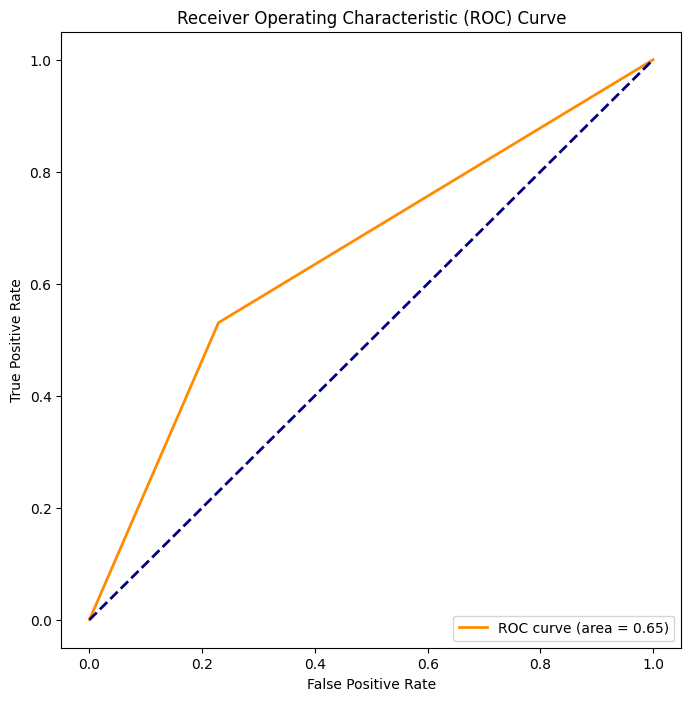

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()